# Loan Approval Dataset Analysis

---

## Dataset Source and Access
The dataset was created and published by **Ta-wei Lo**, a data scientist.  
I accessed it from the **Kaggle website** on **7 February 2026**.  
The dataset does not provide an explicit creation date. According to Kaggle metadata, it was last updated approximately **one year ago**.

---

## Dataset Description and UNSDG Alignment
The dataset used is the **Loan Approval Classification Dataset**, which is **synthetic data** for studying loan approvals and financial risk.  
It relates to **UNSDG 8: Decent Work and Economic Growth**, because analyzing loan approvals helps **catch fraudulent behavior** and ensures loans go to people who actually need them, supporting **fair access to credit and economic opportunities**.

---

## Meaningful Questions the Dataset Can Answer
1. Which factors, such as income, education, employment experience, and home ownership, most influence whether a loan is approved?  
2. Are there patterns of applicants who are more likely to show fraudulent behavior or misuse loans?  
3. Does gender affect the likelihood of applicants exhibiting fraudulent behavior or being denied loans?

---

## Dataset Quality Assessment
- **Missing Values:** The dataset has no missing values; all records are complete.  
- **Imbalance:** The loan approval target variable (`loan_status`) is slightly imbalanced, with more approved loans than rejected ones. This may need handling during modeling.  
- **Relevance:** All columns are relevant to understanding loan approvals and financial risk.  
- **Noise:** Some extreme values exist (e.g., ages over 100, very high incomes), which are outliers and may need cleaning or transformation.

---

## List and Brief Description of All Attributes (Features)
- **person_age** – Age of the applicant (in years).  
- **person_gender** – Gender of the applicant (Male/Female).  
- **person_education** – Highest education level (High School, Associate, Bachelor, Master, Other).  
- **person_income** – Annual income of the applicant (in currency units).  
- **person_emp_exp** – Years of employment experience.  
- **person_home_ownership** – Home ownership status (Rent, Own, Mortgage, Other).  
- **loan_amnt** – Amount of loan requested.  
- **loan_intent** – Purpose of the loan (e.g., Education, Medical, Personal, Venture, Home Improvement, Debt Consolidation, Other).  
- **loan_int_rate** – Interest rate of the loan.  
- **loan_percent_income** – Loan amount as a percentage of the applicant’s annual income.  
- **cb_person_cred_hist_length** – Length of credit history in years.  
- **credit_score** – Applicant’s credit score.  
- **previous_loan_defaults_on_file** – Number of previous loan defaults or indicator of past loan problems.  
- **loan_status** – Target variable; loan approval status (1 = approved, 0 = rejected).




In [2]:
import pandas as pd
import numpy as np

df= pd.read_csv("/content/drive/MyDrive/portfolio/loan_data.csv")

In [3]:
df.shape

(45000, 14)

In [4]:
fake_missing = ['NA', 'N/A', 'None', 'none', 'Unknown', 'unknown']

for col in df.columns:
    print(col)
    print(df[col].isin(fake_missing).sum())


person_age
0
person_gender
0
person_education
0
person_income
0
person_emp_exp
0
person_home_ownership
0
loan_amnt
0
loan_intent
0
loan_int_rate
0
loan_percent_income
0
cb_person_cred_hist_length
0
credit_score
0
previous_loan_defaults_on_file
0
loan_status
0


In [5]:
print((df['person_income'] == 0).sum())
print((df['credit_score'] == 0).sum())
print((df['person_age']== 0).sum())


0
0
0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
df.describe()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
print(df['person_education'].value_counts())
print(df['person_home_ownership'].value_counts())
print(df['loan_intent'].value_counts())


person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64


In [9]:
import pandas as pd
# Check min and max of the age column
min_age = df['person_age'].min()
max_age = df['person_age'].max()

print(f"Minimum age in dataset: {min_age}")
print(f"Maximum age in dataset: {max_age}")

# Identify any unrealistic ages
invalid_ages = df[(df['person_age'] <= 0) | (df['person_age'] > 100)]
print(f"\nNumber of invalid ages: {invalid_ages.shape[0]}")
print("Invalid age rows (if any):")
print(invalid_ages)


Minimum age in dataset: 20
Maximum age in dataset: 144

Number of invalid ages: 7
Invalid age rows (if any):
       person_age person_gender person_education  person_income  \
81            144          male         Bachelor         300616   
183           144          male        Associate         241424   
575           123        female      High School          97140   
747           123          male         Bachelor          94723   
32297         144        female        Associate        7200766   
37930         116          male         Bachelor        5545545   
38113         109          male      High School        5556399   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
81                125                  RENT       4800     VENTURE   
183               121              MORTGAGE       6000   EDUCATION   
575               101                  RENT      20400   EDUCATION   
747               100                  RENT      20000     VENTURE   
3229

In [10]:
# Check for incorrect or missing ages
df['person_age'].describe()

# Replace weird ages with NaN
df.loc[df['person_age'] > 100, 'person_age'] = pd.NA

# Fill missing ages with median
median_age = df['person_age'].median()
df['person_age'] = df['person_age'].fillna(median_age)


In [11]:
def age_group(age):
    if age <= 18:
        return "Minor"
    elif age <= 60:
        return "Adult"
    else:
        return "Senior"

df['age_group'] = df['person_age'].apply(age_group)


In [12]:
import pandas as pd
# Check min and max of the age column
min_age = df['person_age'].min()
max_age = df['person_age'].max()

print(f"Minimum age in dataset: {min_age}")
print(f"Maximum age in dataset: {max_age}")

Minimum age in dataset: 20.0
Maximum age in dataset: 94.0


In [13]:
def edu_to_num(edu):
    if edu == 'High School':
        return 1
    elif edu == 'Associate':
        return 2
    elif edu == 'Bachelor':
        return 3
    elif edu == 'Master':
        return 4
    elif edu == 'Doctorate':
        return 5

df['person_education_numeric'] = df['person_education'].apply(edu_to_num)
print(df[['person_education', 'person_education_numeric']].head(10))



  person_education  person_education_numeric
0           Master                         4
1      High School                         1
2      High School                         1
3         Bachelor                         3
4           Master                         4
5      High School                         1
6         Bachelor                         3
7      High School                         1
8        Associate                         2
9      High School                         1


In [14]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,age_group,person_education_numeric
0,22.0,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1,Adult,4
1,21.0,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0,Adult,1
2,25.0,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1,Adult,1
3,23.0,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1,Adult,3
4,24.0,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1,Adult,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971,6,RENT,15000,MEDICAL,15.66,0.31,3,645,No,1,Adult,2
44996,37.0,female,Associate,65800,17,RENT,9000,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1,Adult,2
44997,33.0,male,Associate,56942,7,RENT,2771,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1,Adult,2
44998,29.0,male,Bachelor,33164,4,RENT,12000,EDUCATION,13.23,0.36,6,604,No,1,Adult,3


In [15]:
# Check unique values in the column
print(df['previous_loan_defaults_on_file'].unique())


['No' 'Yes']


In [16]:
# Convert Yes/No to 1/0 using replace
df['previous_loan_defaults_numeric'] = df['previous_loan_defaults_on_file'].replace({'Yes': 1, 'No': 0})

# Check result
print(df[['previous_loan_defaults_on_file', 'previous_loan_defaults_numeric']].head(10))


  previous_loan_defaults_on_file  previous_loan_defaults_numeric
0                             No                               0
1                            Yes                               1
2                             No                               0
3                             No                               0
4                             No                               0
5                             No                               0
6                             No                               0
7                             No                               0
8                             No                               0
9                             No                               0


/tmp/ipython-input-1548378850.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_loan_defaults_numeric'] = df['previous_loan_defaults_on_file'].replace({'Yes': 1, 'No': 0})


In [17]:
# Filter rows where previous default is Yes and loan was approved
approved_defaults = df[(df['previous_loan_defaults_on_file'] == 'Yes') & (df['loan_status'] == 1)]

# Check result
print(approved_defaults)
print(f"Number of such cases: {approved_defaults.shape[0]}")


Empty DataFrame
Columns: [person_age, person_gender, person_education, person_income, person_emp_exp, person_home_ownership, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, credit_score, previous_loan_defaults_on_file, loan_status, age_group, person_education_numeric, previous_loan_defaults_numeric]
Index: []
Number of such cases: 0


In [18]:
# Mapping based on financial stability
home_mapping = {
    'OTHER': 1,     # least secure
    'RENT': 2,      # renting, moderate security
    'MORTGAGE': 3,  # owning with loan
    'OWN': 4        # fully owns, most secure
}

# Create the new numeric column
df['person_home_ownership_numeric'] = df['person_home_ownership'].map(home_mapping)



In [19]:
# Encode gender: Male = 1, Female = 0
df['person_gender_numeric'] = df['person_gender'].apply(lambda x: 1 if x == 'male' else 0)

# Check result
print(df[['person_gender', 'person_gender_numeric']].head(10))


  person_gender  person_gender_numeric
0        female                      0
1        female                      0
2        female                      0
3        female                      0
4          male                      1
5        female                      0
6        female                      0
7        female                      0
8        female                      0
9        female                      0


In [20]:
import pandas as pd

# One-hot encode loan_intent
df_loan_intent_ohe = pd.get_dummies(df['loan_intent'], prefix='loan_intent')

# Convert True/False to 0/1
df_loan_intent_ohe = df_loan_intent_ohe.astype(int)

# Add to original dataframe
df = pd.concat([df, df_loan_intent_ohe], axis=1)





In [21]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,...,person_education_numeric,previous_loan_defaults_numeric,person_home_ownership_numeric,person_gender_numeric,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,...,4,0,2,0,0,0,0,0,1,0
1,21.0,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,...,1,1,4,0,0,1,0,0,0,0
2,25.0,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,...,1,0,3,0,0,0,0,1,0,0
3,23.0,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,...,3,0,2,0,0,0,0,1,0,0
4,24.0,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,...,4,0,2,1,0,0,0,1,0,0


/tmp/ipython-input-701154127.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_loan_counts = df.groupby(['income_level', 'loan_status']).size().unstack(fill_value=0)


loan_status           0          1
income_level                      
Low           43.782294  56.217706
Medium        72.875974  27.124026
High          86.567904  13.432096
Very High     90.770695   9.229305


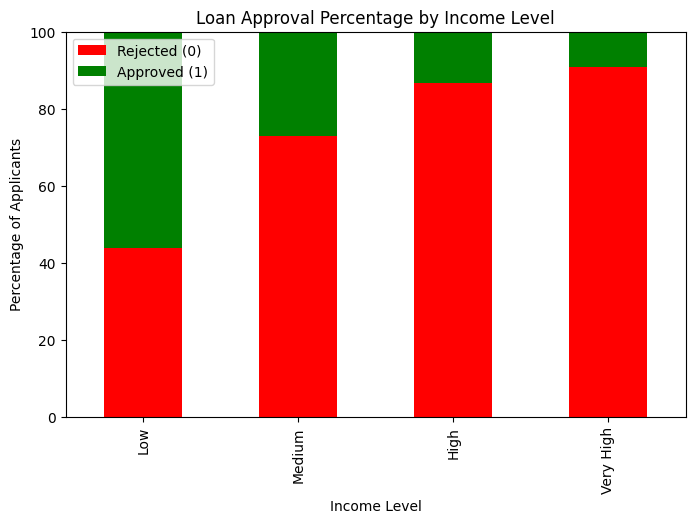

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Bin income levels
bins = [0, 30000, 70000, 150000, df['person_income'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['income_level'] = pd.cut(df['person_income'], bins=bins, labels=labels)

# Count per income_level and loan_status
income_loan_counts = df.groupby(['income_level', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentage of rejected/approved within each income_level
income_loan_percent = income_loan_counts.div(income_loan_counts.sum(axis=1), axis=0) * 100
print(income_loan_percent)

# Plot stacked bar chart with percentages
income_loan_percent.plot(kind='bar', stacked=True, figsize=(8,5), color=['red', 'green'])
plt.title("Loan Approval Percentage by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Percentage of Applicants")
plt.legend(["Rejected (0)", "Approved (1)"])
plt.ylim(0, 100)
plt.show()


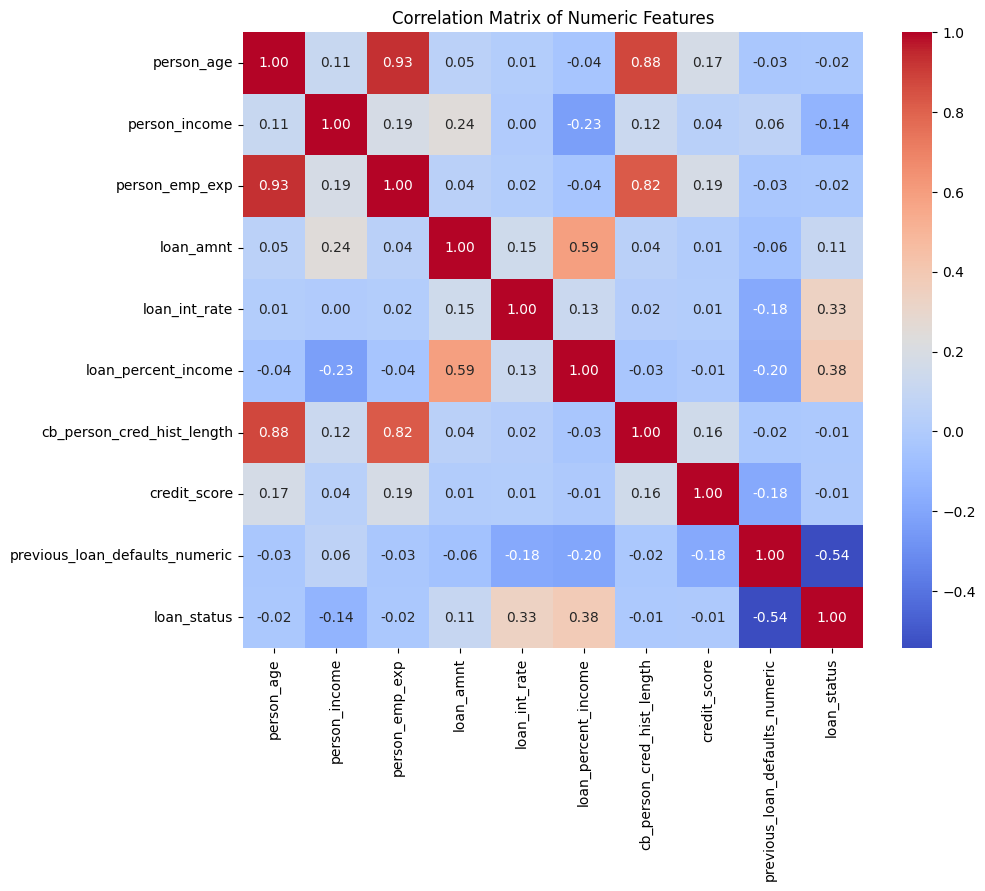

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation of numeric columns
numeric_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                'credit_score', 'previous_loan_defaults_numeric', 'loan_status']

corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [24]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,...,previous_loan_defaults_numeric,person_home_ownership_numeric,person_gender_numeric,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,income_level
0,22.0,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,...,0,2,0,0,0,0,0,1,0,High
1,21.0,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,...,1,4,0,0,1,0,0,0,0,Low
2,25.0,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,...,0,3,0,0,0,0,1,0,0,Low
3,23.0,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,...,0,2,0,0,0,0,1,0,0,High
4,24.0,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,...,0,2,1,0,0,0,1,0,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971,6,RENT,15000,MEDICAL,15.66,0.31,...,0,2,1,0,0,0,1,0,0,Medium
44996,37.0,female,Associate,65800,17,RENT,9000,HOMEIMPROVEMENT,14.07,0.14,...,0,2,0,0,0,1,0,0,0,Medium
44997,33.0,male,Associate,56942,7,RENT,2771,DEBTCONSOLIDATION,10.02,0.05,...,0,2,1,1,0,0,0,0,0,Medium
44998,29.0,male,Bachelor,33164,4,RENT,12000,EDUCATION,13.23,0.36,...,0,2,1,0,1,0,0,0,0,Medium


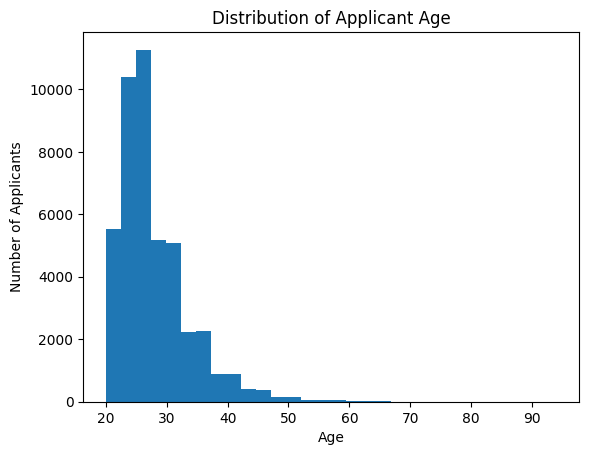

In [25]:
import matplotlib.pyplot as plt

plt.hist(df['person_age'], bins=30)
plt.xlabel("Age")
plt.ylabel("Number of Applicants")
plt.title("Distribution of Applicant Age")
plt.show()


The age distribution shows that most loan applicants are between young and middle adulthood

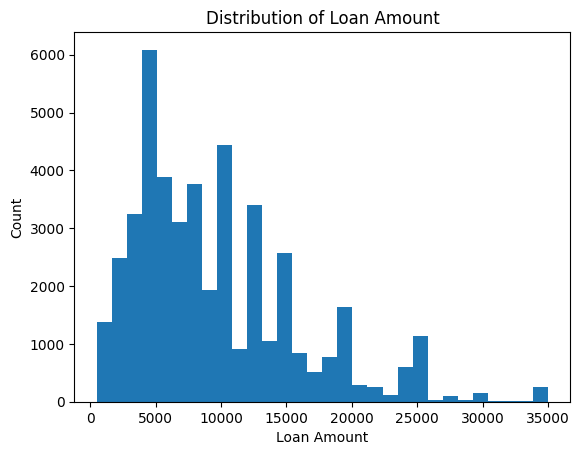

In [26]:
# Check how loan amounts are spread across applicants
plt.hist(df['loan_amnt'], bins=30)
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.title("Distribution of Loan Amount")
plt.show()


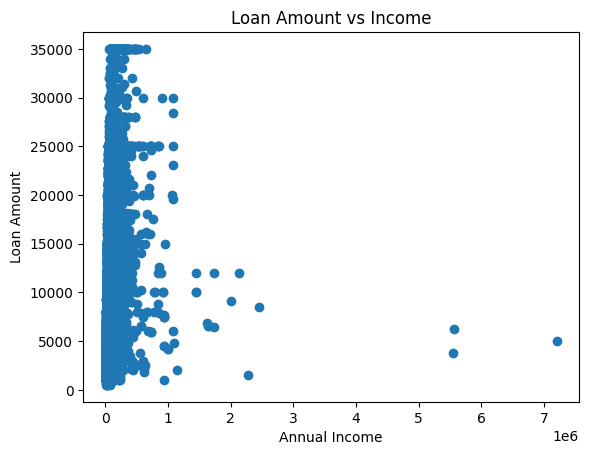

In [27]:
# Scatter plot to observe the relationship between income and loan amount
plt.scatter(df['person_income'], df['loan_amnt'])
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Income")
plt.show()


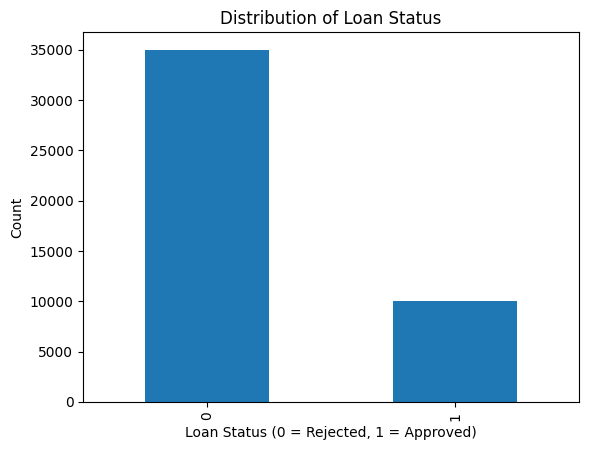

In [28]:
# Bar chart showing number of approved vs rejected loans
df['loan_status'].value_counts().plot(kind='bar')
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.title("Distribution of Loan Status")
plt.show()


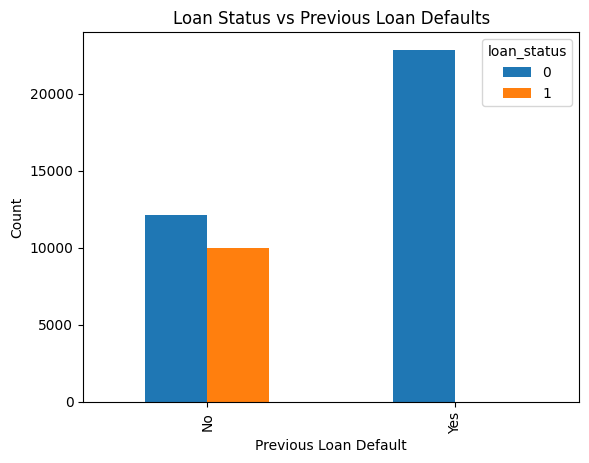

In [29]:
# Cross-tabulation to see how previous defaults affect loan approval
pd.crosstab(
    df['previous_loan_defaults_on_file'],
    df['loan_status']
).plot(kind='bar')

plt.xlabel("Previous Loan Default")
plt.ylabel("Count")
plt.title("Loan Status vs Previous Loan Defaults")
plt.show()


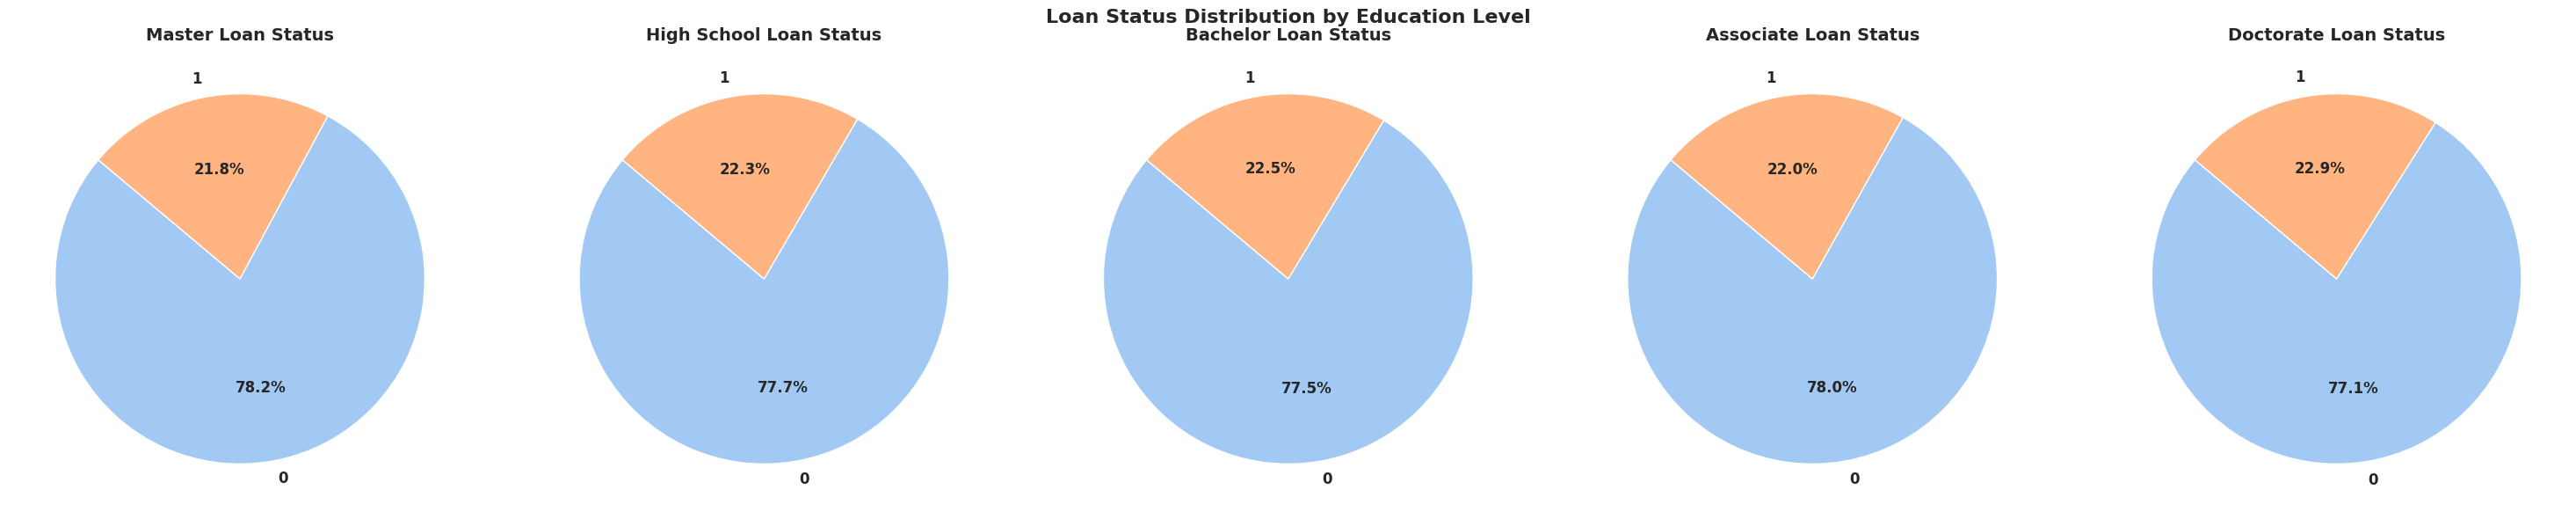

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Get unique education levels
education_levels = df['person_education'].unique()

# Create subplots: one pie chart per education level
fig, axes = plt.subplots(1, len(education_levels), figsize=(6 * len(education_levels), 6))

if len(education_levels) == 1:
    axes = [axes]  # handle single subplot

for ax, edu in zip(axes, education_levels):
    # Count Approved vs Rejected for this education level
    counts = df[df['person_education'] == edu]['loan_status'].value_counts()

    # Define colors
    colors = sns.color_palette('pastel')[0:len(counts)]

    # Plot pie chart
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',  # show percentage
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    ax.set_title(f"{edu} Loan Status", fontsize=14, weight='bold')

plt.suptitle("Loan Status Distribution by Education Level", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   person_age                      45000 non-null  float64 
 1   person_gender                   45000 non-null  object  
 2   person_education                45000 non-null  object  
 3   person_income                   45000 non-null  int64   
 4   person_emp_exp                  45000 non-null  int64   
 5   person_home_ownership           45000 non-null  object  
 6   loan_amnt                       45000 non-null  int64   
 7   loan_intent                     45000 non-null  object  
 8   loan_int_rate                   45000 non-null  float64 
 9   loan_percent_income             45000 non-null  float64 
 10  cb_person_cred_hist_length      45000 non-null  int64   
 11  credit_score                    45000 non-null  int64   
 12  previous_loan_defa

In [32]:
# List of numeric columns
numeric_cols = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score',
    'person_education_numeric',
    'previous_loan_defaults_numeric',
    'person_home_ownership_numeric',
    'person_gender_numeric'
]

# List of existing one-hot encoded loan_intent columns
loan_intent_cols = [
    'loan_intent_DEBTCONSOLIDATION',
    'loan_intent_EDUCATION',
    'loan_intent_HOMEIMPROVEMENT',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_VENTURE'
]

# Combine numeric, one-hot encoded, and target
df_numeric = df[numeric_cols + loan_intent_cols + ['loan_status']]

# Check the new dataframe
print(df_numeric.head())
print("\nColumns in df_numeric:")
print(df_numeric.columns)


   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0          71948               0      35000          16.02   
1        21.0          12282               0       1000          11.14   
2        25.0          12438               3       5500          12.87   
3        23.0          79753               0      35000          15.23   
4        24.0          66135               1      35000          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                           3           561   
1                 0.08                           2           504   
2                 0.44                           3           635   
3                 0.44                           2           675   
4                 0.53                           4           586   

   person_education_numeric  previous_loan_defaults_numeric  \
0                         4                               0   
1                   

In [33]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_income                   45000 non-null  int64  
 2   person_emp_exp                  45000 non-null  int64  
 3   loan_amnt                       45000 non-null  int64  
 4   loan_int_rate                   45000 non-null  float64
 5   loan_percent_income             45000 non-null  float64
 6   cb_person_cred_hist_length      45000 non-null  int64  
 7   credit_score                    45000 non-null  int64  
 8   person_education_numeric        45000 non-null  int64  
 9   previous_loan_defaults_numeric  45000 non-null  int64  
 10  person_home_ownership_numeric   45000 non-null  int64  
 11  person_gender_numeric           45000 non-null  int64  
 12  loan_intent_DEBTCONSOLIDATION   

In [34]:
# Count of each class
class_counts = df_numeric['loan_status'].value_counts()
print("Class counts:\n", class_counts)

# Percentage of each class
class_percentage = df_numeric['loan_status'].value_counts(normalize=True) * 100
print("\nClass percentage:\n", class_percentage)


Class counts:
 loan_status
0    35000
1    10000
Name: count, dtype: int64

Class percentage:
 loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64


If there are clear patterns in the features that determine loan rejection, why is class imbalance a problem?

Class imbalance is an issue even if patterns exist, because machine learning models learn from the frequency of examples, not just the patterns themselves.

=== Logistic Regression Metrics ===
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6990
           1       0.63      0.91      0.74      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.88      0.82      9000
weighted avg       0.89      0.86      0.87      9000

Accuracy: 0.8591111111111112
Precision: 0.6268809849521204
Recall: 0.9119402985074627
F1 Score: 0.7430077016619375


=== Decision Tree Metrics ===
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6990
           1       0.77      0.80      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.87      0.86      9000
weighted avg       0.90      0.90      0.90      9000

Accuracy: 0.9022222222222223
Precision: 0.7713736791546589
Recall: 0.7990049751243781
F1 Score: 0.7849462365591398


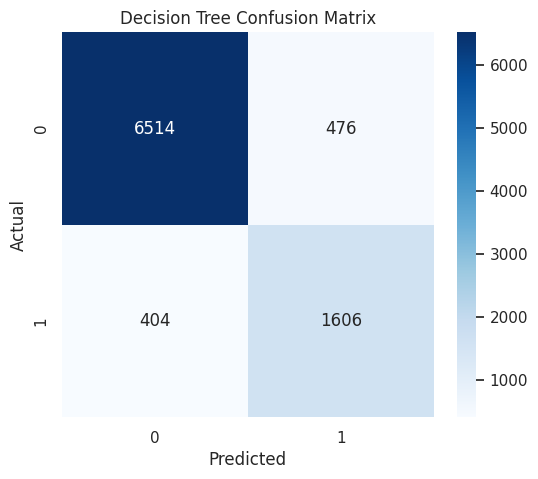

In [35]:
# =========================
# Loan Approval Prediction
# Logistic Regression vs Decision Tree
# =========================

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# =========================
# 1. Prepare Features and Target
# =========================
# Assuming df_numeric is your preprocessed dataframe with numeric and one-hot encoded columns
X = df_numeric.drop('loan_status', axis=1)  # features
y = df_numeric['loan_status']               # target

# =========================
# 2. Split into Train/Test
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 3. Feature Scaling for Logistic Regression
# Decision Tree does NOT need scaling
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 4. Train Logistic Regression
# Use balanced class weights in case of class imbalance
# =========================
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# =========================
# 5. Train Decision Tree
# =========================
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# =========================
# 6. Make Predictions
# =========================
y_pred_log = log_model.predict(X_test_scaled)
y_pred_dt = dt_model.predict(X_test)

# =========================
# 7. Evaluate Models
# =========================

# --- Logistic Regression ---
print("=== Logistic Regression Metrics ===")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("\n")

# --- Decision Tree ---
print("=== Decision Tree Metrics ===")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

# =========================
# 8. Visualize Decision Tree Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features and target
X = df_numeric.drop('loan_status', axis=1)
y = df_numeric['loan_status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple grid of hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'penalty': ['l2'],  # keep it simple with default L2
    'solver': ['lbfgs']  # default solver
}

# Grid search
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Hyperparameters:", grid.best_params_)

# Predictions and report
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6990
           1       0.74      0.73      0.73      2010

    accuracy                           0.88      9000
   macro avg       0.83      0.83      0.83      9000
weighted avg       0.88      0.88      0.88      9000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid=param_grid_dt, cv=5, scoring='f1')
grid_dt.fit(X, y)

print("Best Decision Tree Hyperparameters:", grid_dt.best_params_)
print("Best CV F1 Score:", grid_dt.best_score_)


Best Decision Tree Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV F1 Score: 0.7996192355051519


In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# =========================
# Logistic Regression Feature Selection
# =========================
# Use the scaled training data for Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rfe_lr = RFE(lr_model, n_features_to_select=10)  # select top 10 features
rfe_lr.fit(X_train_scaled, y_train)              # use X_train_scaled
selected_features_lr = X.columns[rfe_lr.support_]  # original column names
print("Selected Features for Logistic Regression:", list(selected_features_lr))

# =========================
# Decision Tree Feature Selection
# =========================
# Decision Tree does NOT need scaling, use X_train
dt_model = DecisionTreeClassifier(random_state=42)
rfe_dt = RFE(dt_model, n_features_to_select=10)
rfe_dt.fit(X_train, y_train)                     # use X_train (not scaled)
selected_features_dt = X.columns[rfe_dt.support_]
print("Selected Features for Decision Tree:", list(selected_features_dt))


Selected Features for Logistic Regression: ['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score', 'previous_loan_defaults_numeric', 'person_home_ownership_numeric', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_VENTURE']
Selected Features for Decision Tree: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_numeric', 'person_home_ownership_numeric']


In [39]:
# ==========================
# 5. Final Models with Selected Features
# ==========================

# Logistic Regression final model
X_train_lr = X_train_scaled[:, rfe_lr.support_]
X_test_lr = X_test_scaled[:, rfe_lr.support_]

final_lr = LogisticRegression(**grid.best_params_, max_iter=1000, random_state=42)

final_lr.fit(X_train_lr, y_train)
y_pred_lr = final_lr.predict(X_test_lr)

# Decision Tree final model
X_train_dt = X_train[selected_features_dt]
X_test_dt = X_test[selected_features_dt]

final_dt = DecisionTreeClassifier(**grid_dt.best_params_, random_state=42)
final_dt.fit(X_train_dt, y_train)
y_pred_dt = final_dt.predict(X_test_dt)

# ==========================
# 6. Evaluate and Compare Models
# ==========================

comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Features': [len(selected_features_lr), len(selected_features_dt)],
    'CV Score': [grid.best_score_, grid_dt.best_score_],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt)],
    'F1-Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt)]
})

print("\nFinal Model Comparison Table:")
print(comparison_table)


Final Model Comparison Table:
                 Model  Features  CV Score  Accuracy  Precision    Recall  \
0  Logistic Regression        10  0.735779  0.893667   0.772375  0.742786   
1        Decision Tree        10  0.799619  0.913333   0.865636  0.724378   

   F1-Score  
0  0.757291  
1  0.788732  


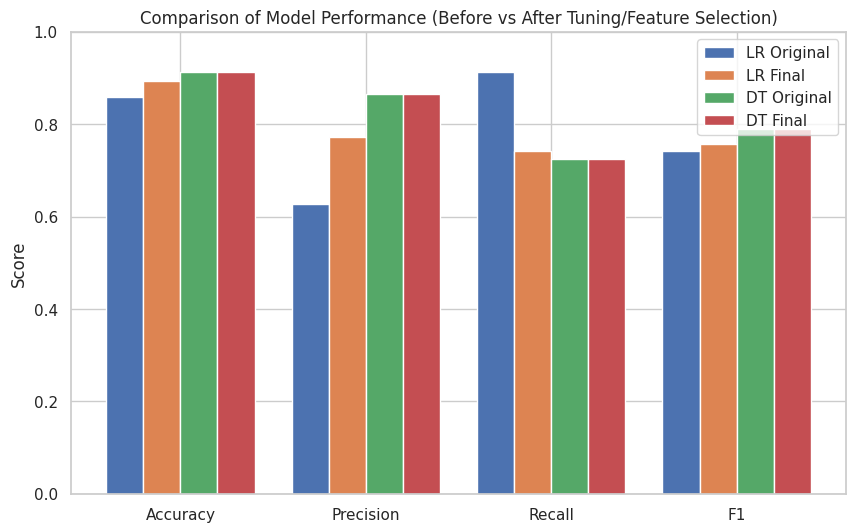

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for models
metrics_data = {
    'Model': ['LR Original', 'LR Final', 'DT Original', 'DT Final'],
    'Accuracy': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_dt)],
    'Precision': [precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_lr),
                  precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_dt)],
    'Recall': [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_lr),
               recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_dt)],
    'F1': [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_lr),
           f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt)]
}

df_metrics = pd.DataFrame(metrics_data)

# Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x = np.arange(len(metrics))  # metric positions
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, df_metrics.loc[0, metrics], width, label='LR Original')
ax.bar(x - 0.5*width, df_metrics.loc[1, metrics], width, label='LR Final')
ax.bar(x + 0.5*width, df_metrics.loc[2, metrics], width, label='DT Original')
ax.bar(x + 1.5*width, df_metrics.loc[3, metrics], width, label='DT Final')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance (Before vs After Tuning/Feature Selection)')
ax.legend()
plt.show()


=== Neural Network Training Set Metrics ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     28010
           1       0.87      0.80      0.83      7990

    accuracy                           0.93     36000
   macro avg       0.91      0.88      0.89     36000
weighted avg       0.93      0.93      0.93     36000

Accuracy: 0.9288611111111111

=== Neural Network Test Set Metrics ===
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.84      0.79      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.89      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000

Accuracy: 0.9184444444444444


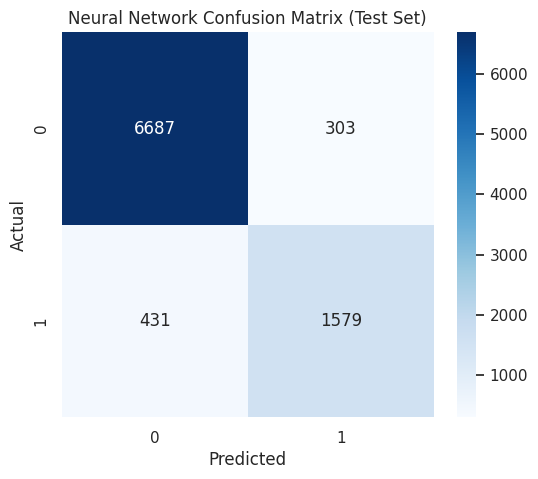

In [41]:
# =========================
# Neural Network using scikit-learn MLPClassifier
# =========================
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Define the Neural Network model
# hidden_layer_sizes=(32,16) -> 2 hidden layers: 32 neurons, 16 neurons
nn_model = MLPClassifier(
    hidden_layer_sizes=(32,16),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# 2️⃣ Train the model using already scaled data
nn_model.fit(X_train_scaled, y_train)

# 3️⃣ Predictions
y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

# 4️⃣ Evaluate Metrics - Training Set
print("=== Neural Network Training Set Metrics ===")
print(classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# 5️⃣ Evaluate Metrics - Test Set
print("\n=== Neural Network Test Set Metrics ===")
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

# 6️⃣ Confusion Matrix - Test Set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Neural Network Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



=== Metrics Table ===
       Model  Accuracy  Precision    Recall        F1
0  LR Normal  0.859111   0.626881  0.911940  0.743008
1   LR Tuned  0.893667   0.772375  0.742786  0.757291
2         NN  0.918444   0.839001  0.785572  0.811408


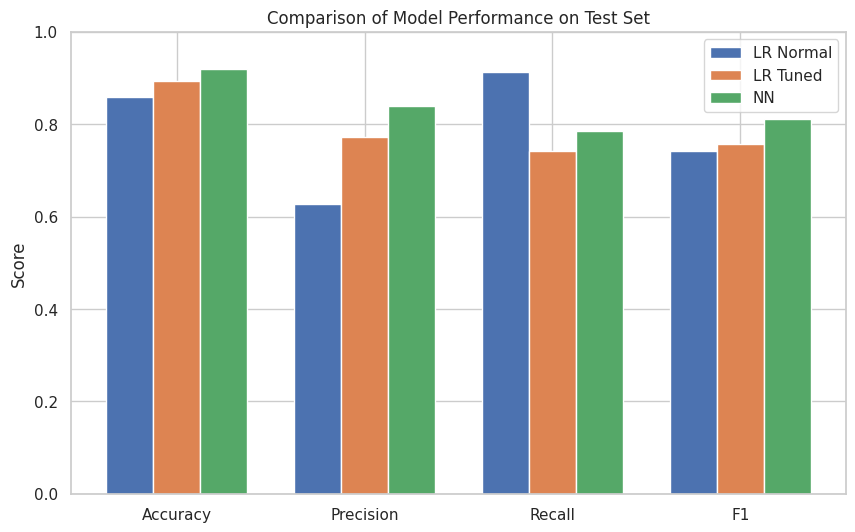

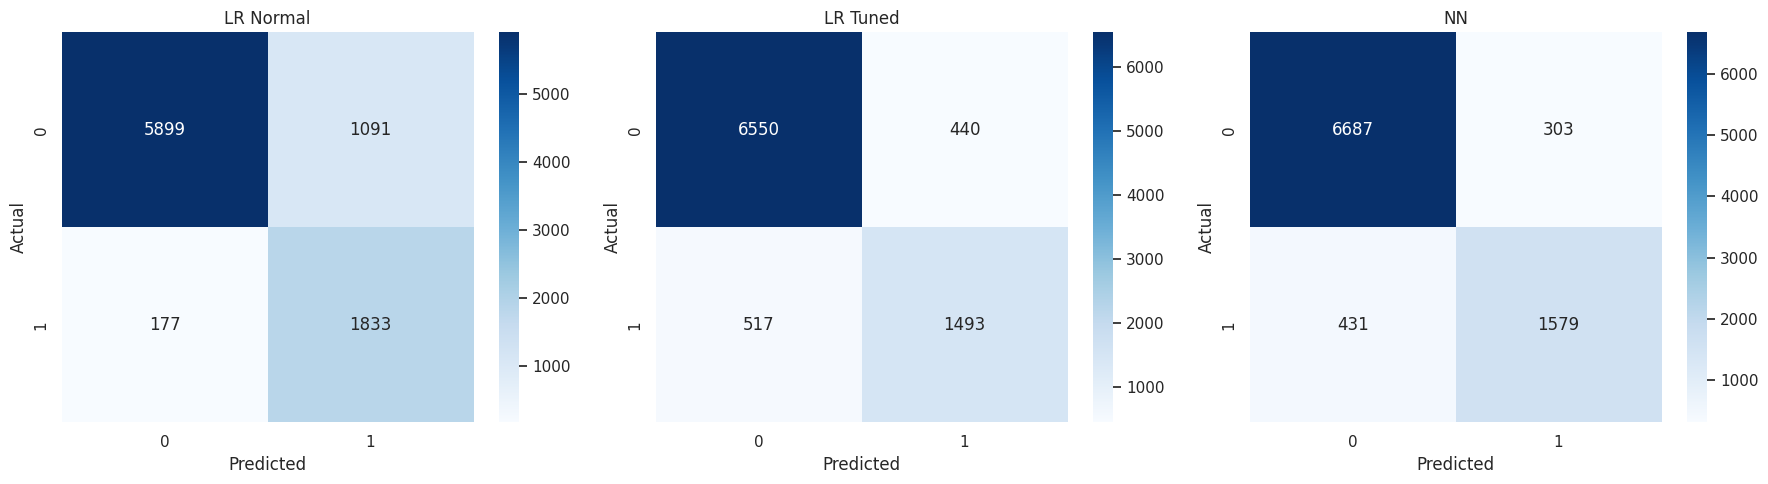

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# -------------------------
# 1️⃣ Collect metrics
# -------------------------
models_metrics = {
    'LR Normal': y_pred_log,
    'LR Tuned': y_pred_lr,
    'NN': y_test_pred
}

metrics_summary = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}

for name, y_pred_model in models_metrics.items():
    metrics_summary['Model'].append(name)
    metrics_summary['Accuracy'].append(accuracy_score(y_test, y_pred_model))
    metrics_summary['Precision'].append(precision_score(y_test, y_pred_model))
    metrics_summary['Recall'].append(recall_score(y_test, y_pred_model))
    metrics_summary['F1'].append(f1_score(y_test, y_pred_model))

df_metrics = pd.DataFrame(metrics_summary)
print("\n=== Metrics Table ===")
print(df_metrics)

# -------------------------
# 2️⃣ Bar chart for metrics
# -------------------------
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, df_metrics.loc[0, metrics], width, label='LR Normal')
plt.bar(x, df_metrics.loc[1, metrics], width, label='LR Tuned')
plt.bar(x + width, df_metrics.loc[2, metrics], width, label='NN')
plt.xticks(x, metrics)
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Comparison of Model Performance on Test Set')
plt.legend()
plt.show()

# -------------------------
# 3️⃣ Confusion matrices side by side
# -------------------------
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for i, (name, y_pred_model) in enumerate(models_metrics.items()):
    cm = confusion_matrix(y_test, y_pred_model)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
